---
### 6.4.1 基本概念和算法
#### 1. Kruskal 算法
#### 2. Prim 算法

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
Adjt = [(0,1,2),(0,2,1),(0,3,3),(0,4,4),(0,5,4),(0,6,2),(0,7,5),(0,8,4),
    (1,2,4),(1,8,1),(2,3,1),(3,4,1),(4,5,5),(5,6,2),(6,7,3),(7,8,5)]
n = 9
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_weighted_edges_from(Adjt)
T = nx.minimum_spanning_tree(G)
W = nx.to_numpy_matrix(T)
print('最小生成树 T 的邻接矩阵：', W, sep='\n')
print('T 的权重：', np.sum(W)/2)

最小生成树 T 的邻接矩阵：
[[0. 2. 1. 0. 0. 0. 2. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [2. 0. 0. 0. 0. 2. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]
T 的权重： 13.0


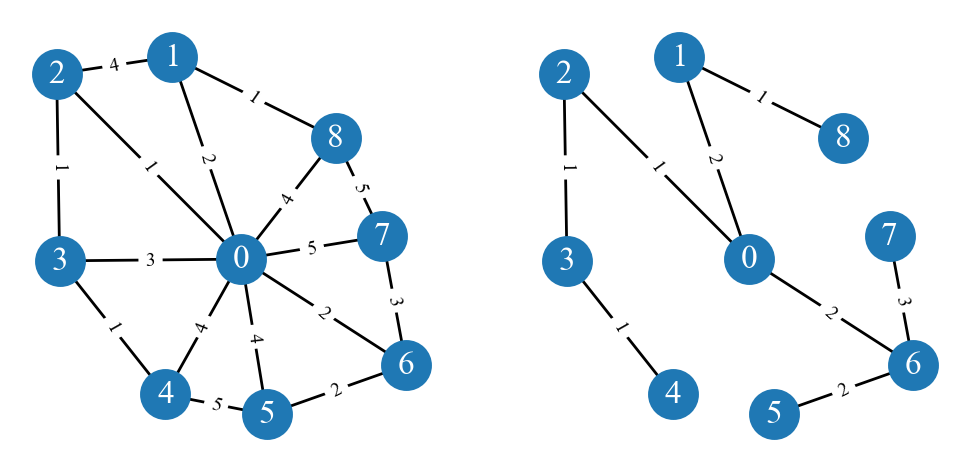

In [3]:
fig = plt.figure()
ax = fig.add_subplot(121)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_color='w')
w1 = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=w1, font_size=7)
ax.set_aspect(1)

ax1 = fig.add_subplot(122)
nx.draw(T, pos, with_labels=True, font_color='w')
w2 = nx.get_edge_attributes(T, 'weight')
nx.draw_networkx_edge_labels(T, pos, edge_labels=w2, font_size=7)
ax1.set_aspect(1)

### 6.4.2 最小生成树的数学规划模型
最小生成树问题的 0-1 整数规划模型如下
$$
\begin{align*}
&\min z=\sum\limits_{i=1}^n \sum\limits_{j=1}^nw_{ij}x_{ij},\\
&{\rm s.t.}
	\begin{cases}
	\sum\limits_{j=1}^nx_{1j}\geq1,\\
    \sum\limits_{i=1}^nx_{ij}=1,\quad j=2,\cdots,n,\\
	u_i-u_j+nx_{ij}\leq n-1, \quad i=1,2,\cdots,n,\ j=2,\cdots,n\\
    u_1=0, \ 1\leq u_i\leq n-1, \quad i=2,3,\cdots,n, \\
    x_{ij}=0\,\text{或}\,1, \quad i,j=1,2,\cdots, n.
	\end{cases}
\end{align*}
$$

In [4]:
import cvxpy as cp

W = nx.to_numpy_array(G)
infty = 1e3
W[np.where(W==0)] = infty
W

array([[1000.,    2.,    1.,    3.,    4.,    4.,    2.,    5.,    4.],
       [   2., 1000.,    4., 1000., 1000., 1000., 1000., 1000.,    1.],
       [   1.,    4., 1000.,    1., 1000., 1000., 1000., 1000., 1000.],
       [   3., 1000.,    1., 1000.,    1., 1000., 1000., 1000., 1000.],
       [   4., 1000., 1000.,    1., 1000.,    5., 1000., 1000., 1000.],
       [   4., 1000., 1000., 1000.,    5., 1000.,    2., 1000., 1000.],
       [   2., 1000., 1000., 1000., 1000.,    2., 1000.,    3., 1000.],
       [   5., 1000., 1000., 1000., 1000., 1000.,    3., 1000.,    5.],
       [   4.,    1., 1000., 1000., 1000., 1000., 1000.,    5., 1000.]])

In [5]:
x = cp.Variable((n, n), boolean=True)
u = cp.Variable(n, integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(W, x)))
cons = [
    cp.sum(x[0, :]) >= 1,
    cp.sum(x[:, 1:], axis=0) == 1,
    u[0] == 0,
    1 <= u[1:], u[1:] <= n-1,
]
for i in range(n):
    for j in range(1, n):
        cons.append(u[i] - u[j] + n*x[i,j] <= n-1)
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：\n{x.value}'); print(f'最优值为：{prob.value}')

最优解为：
[[ 0.  1.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
最优值为：13.0
